<a href="https://colab.research.google.com/github/donosonahuel/alura-telecom/blob/main/Alura_Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📑Extracción de datos

In [7]:
import pandas as pd

In [8]:
datos_clientes = pd.read_json('TelecomX_Data.json')

In [9]:
datos_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [10]:
datos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# ➡️Transformación de los datos

## Creando columnas de ID y Churn

In [11]:
data_clients = datos_clientes[['customerID', 'Churn']]

In [12]:
data_clients.to_json('data_telecom.json')

In [13]:
datos = pd.read_json('data_telecom.json')

In [14]:
datos['customerID'] = datos['customerID'].astype('string').str.lower()

In [15]:
datos['Churn'] = datos['Churn'].astype(str).str.lower()
datos['Churn'] = datos['Churn'].replace({'yes': True, 'no': False}).astype(bool)

In [16]:
datos.head()

,customerID,Churn
0,0002-orfbo,False
1,0003-mknfe,False
2,0004-tlhlj,True
3,0011-igkff,True
4,0013-exchz,True


In [17]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   string
 1   Churn       7267 non-null   bool  
dtypes: bool(1), string(1)
memory usage: 120.6 KB


In [18]:
datos.to_json('data_telecom_dtype.json')

## Normalizando archivo JSON

In [19]:
df_normalizado_customer = pd.json_normalize(datos_clientes['customer'])
df_normalizado_phone = pd.json_normalize(datos_clientes['phone'])
df_normalizado_internet = pd.json_normalize(datos_clientes['internet'])
df_normalizado_account = pd.json_normalize(datos_clientes['account'])

## Guardando los archivos normalizados JSON

In [20]:
df_normalizado_account.to_json('account_telecom.json')
df_normalizado_customer.to_json('customer_telecom.json')
df_normalizado_phone.to_json('phone_telecom.json')
df_normalizado_internet.to_json('internet_telecom.json')

## Trabajando con los Data Frames

In [21]:
import numpy as np

### Archivo: account_telecom.json

In [22]:
cuentas = pd.read_json('account_telecom.json')

In [23]:
cuentas['Charges.Total'] = cuentas['Charges.Total'].astype(str).str.replace(',', '', regex=False)
cuentas['Charges.Total'] = cuentas['Charges.Total'].str.strip()
cuentas['Charges.Total'] = pd.to_numeric(cuentas['Charges.Total'], errors='coerce')
cuentas['Charges.Total'] = cuentas['Charges.Total'].astype(np.float64)

In [24]:
cuentas['PaperlessBilling'] = cuentas['PaperlessBilling'].astype(str).str.lower()
cuentas['PaperlessBilling'] = cuentas['PaperlessBilling'].replace({'yes': True, 'no': False}).astype(bool)

<ipython-input-24-3128877783>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cuentas['PaperlessBilling'] = cuentas['PaperlessBilling'].replace({'yes': True, 'no': False}).astype(bool)


In [25]:
cuentas['PaymentMethod'] = cuentas['PaymentMethod'].astype('string').str.lower()

In [26]:
cuentas['Contract'] = cuentas['Contract'].astype('string').str.lower()

In [27]:
cuentas.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,one year,True,mailed check,65.6,593.30
1,month-to-month,False,mailed check,59.9,542.40
2,month-to-month,True,electronic check,73.9,280.85
3,month-to-month,True,electronic check,98.0,1237.85
4,month-to-month,True,mailed check,83.9,267.40


In [28]:
cuentas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   string 
 1   PaperlessBilling  7267 non-null   bool   
 2   PaymentMethod     7267 non-null   string 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7256 non-null   float64
dtypes: bool(1), float64(2), string(2)
memory usage: 291.0 KB


In [29]:
cuentas.to_json('account_telecom_dtype.json')

### Archivo: customer_telecom.json

In [30]:
clientes = pd.read_json('customer_telecom.json')

In [31]:
clientes['gender'] = clientes['gender'].astype('string').str.lower()

In [32]:
clientes['Partner'] = clientes['Partner'].astype(str).str.lower()
clientes['Partner'] = clientes['Partner'].replace({'yes': True, 'no': False}).astype(bool)

<ipython-input-32-3369902856>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clientes['Partner'] = clientes['Partner'].replace({'yes': True, 'no': False}).astype(bool)


In [33]:
clientes['Dependents'] = clientes['Dependents'].astype(str).str.lower()
clientes['Dependents'] = clientes['Dependents'].replace({'yes': True, 'no': False}).astype(bool)

<ipython-input-33-2627143846>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clientes['Dependents'] = clientes['Dependents'].replace({'yes': True, 'no': False}).astype(bool)


In [34]:
clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,female,0,True,True,9
1,male,0,False,False,9
2,male,0,False,False,4
3,male,1,True,False,13
4,female,1,True,False,3


In [35]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   string
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   bool  
 3   Dependents     7267 non-null   bool  
 4   tenure         7267 non-null   int64 
dtypes: bool(2), int64(2), string(1)
memory usage: 241.3 KB


In [36]:
clientes.to_json('customer_telecom_dtype.json')

### Archivo: phone_telecom.json

In [37]:
telefono = pd.read_json('phone_telecom.json')

In [38]:
telefono['PhoneService'] = telefono['PhoneService'].astype(str).str.lower()
telefono['PhoneService'] = telefono['PhoneService'].replace({'yes': True, 'no': False}).astype(bool)

<ipython-input-38-2983714834>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telefono['PhoneService'] = telefono['PhoneService'].replace({'yes': True, 'no': False}).astype(bool)


In [39]:
telefono['MultipleLines'] = telefono['MultipleLines'].astype(str).str.lower()
telefono['MultipleLines'] = telefono['MultipleLines'].replace({'yes': True, 'no': False}).astype(bool)

In [40]:
telefono.head()

,PhoneService,MultipleLines
0,True,False
1,True,True
2,True,False
3,True,False
4,True,False


In [41]:
telefono.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PhoneService   7267 non-null   bool 
 1   MultipleLines  7267 non-null   bool 
dtypes: bool(2)
memory usage: 71.0 KB


In [42]:
telefono.to_json('phone_telecom_dtype.json')

### Archivo: internet_telecom.json

In [43]:
internet = pd.read_json('internet_telecom.json')

In [44]:
internet['InternetService'] = internet['InternetService'].astype('string').str.lower()

In [45]:
internet['OnlineSecurity'] = internet['OnlineSecurity'].astype(str).str.lower()
internet['OnlineSecurity'] = internet['OnlineSecurity'].replace({'yes': True, 'no': False}).astype(bool)

In [46]:
internet['OnlineBackup'] = internet['OnlineBackup'].astype(str).str.lower()
internet['OnlineBackup'] = internet['OnlineBackup'].replace({'yes': True, 'no': False}).astype(bool)

In [47]:
internet['DeviceProtection'] = internet['DeviceProtection'].astype(str).str.lower()
internet['DeviceProtection'] = internet['DeviceProtection'].replace({'yes': True, 'no': False}).astype(bool)

In [48]:
internet['TechSupport'] = internet['TechSupport'].astype(str).str.lower()
internet['TechSupport'] = internet['TechSupport'].replace({'yes': True, 'no': False}).astype(bool)

In [49]:
internet['StreamingTV'] = internet['StreamingTV'].astype(str).str.lower()
internet['StreamingTV'] = internet['StreamingTV'].replace({'yes': True, 'no': False}).astype(bool)

In [50]:
internet['StreamingMovies'] = internet['StreamingMovies'].astype(str).str.lower()
internet['StreamingMovies'] = internet['StreamingMovies'].replace({'yes': True, 'no': False}).astype(bool)

In [51]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,dsl,False,True,False,True,True,False
1,dsl,False,False,False,False,False,True
2,fiber optic,False,False,True,False,False,False
3,fiber optic,False,True,True,False,True,True
4,fiber optic,False,False,False,True,True,False


In [52]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   string
 1   OnlineSecurity    7267 non-null   bool  
 2   OnlineBackup      7267 non-null   bool  
 3   DeviceProtection  7267 non-null   bool  
 4   TechSupport       7267 non-null   bool  
 5   StreamingTV       7267 non-null   bool  
 6   StreamingMovies   7267 non-null   bool  
dtypes: bool(6), string(1)
memory usage: 156.1 KB


In [53]:
internet.to_json('internet_telecom_dtype.json')

# 🧮Analisis de los datos

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

## Trabajando con "data_telecom_dtype.json"

### Explorando el DataFrame

In [55]:
data_id_telecom = pd.read_json('data_telecom_dtype.json')

In [56]:
data_id_telecom['customerID'] = data_id_telecom['customerID'].astype('string').str.lower()

In [57]:
# 1. Generando las primeras 5 filas
data_id_telecom.head()

,customerID,Churn
0,0002-orfbo,False
1,0003-mknfe,False
2,0004-tlhlj,True
3,0011-igkff,True
4,0013-exchz,True


In [58]:
# 2. La info de que tipo de datos es el Data Frame
data_id_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   string
 1   Churn       7267 non-null   bool  
dtypes: bool(1), string(1)
memory usage: 120.6 KB


In [59]:
# 3. Obteniendo el numero de filas y columnas
data_id_telecom.shape

(7267, 2)

In [60]:
# 4. Generar estadísticas descriptivas para todas las columnas, incluidas las no numéricas
data_id_telecom.describe(include = 'all')

,customerID,Churn
count,7267,7267
unique,7267,2
top,0011-igkff,False
freq,1,5398


## Analizando "account_telecom_dtype.json"

### Explorando el DataFrame

In [61]:
cuentas_telecom = pd.read_json('account_telecom_dtype.json')

In [62]:
cuentas_telecom['Contract'] = cuentas_telecom['Contract'].astype('string').str.lower()
cuentas_telecom['PaymentMethod'] = cuentas_telecom['PaymentMethod'].astype('string').str.lower()

In [63]:
# 1. Mostrando las primeras filas del Data Frame
cuentas_telecom.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,one year,True,mailed check,65.6,593.30
1,month-to-month,False,mailed check,59.9,542.40
2,month-to-month,True,electronic check,73.9,280.85
3,month-to-month,True,electronic check,98.0,1237.85
4,month-to-month,True,mailed check,83.9,267.40


In [64]:
# 2. Información general del Data Frame
cuentas_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   string 
 1   PaperlessBilling  7267 non-null   bool   
 2   PaymentMethod     7267 non-null   string 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7256 non-null   float64
dtypes: bool(1), float64(2), string(2)
memory usage: 291.0 KB


In [65]:
# 3. El total de filas y columnas
cuentas_telecom.shape

(7267, 5)

In [66]:
# 3. Resumen estadistico de las columnas
cuentas_telecom.describe()

,Charges.Monthly,Charges.Total
count,7267.000000,7256.000000
mean,64.720098,2280.634213
std,30.129572,2268.632997
min,18.250000,18.800000
25%,35.425000,400.225000
50%,70.300000,1391.000000
75%,89.875000,3785.300000
max,118.750000,8684.800000


In [67]:
# 3.1. Resumen estadistico mas descriptivo de las columnas
cuentas_telecom.describe(include = 'all')

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7267,7267,7267.000000,7256.000000
unique,3,2,4,NaN,NaN
top,month-to-month,True,electronic check,NaN,NaN
freq,4005,4311,2445,NaN,NaN
mean,NaN,NaN,NaN,64.720098,2280.634213
std,NaN,NaN,NaN,30.129572,2268.632997
min,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,35.425000,400.225000
50%,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,NaN,89.875000,3785.300000


In [68]:
# 4. Verificar si hay datos nulos
cuentas_telecom.isnull().sum()

,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges.Monthly,0
Charges.Total,11


### Adicionalmente evaluando las columnas por valores unicos (Strings y Booleans)

In [69]:
# 4. Verificar valores unicos y contar la frecuencia en cada columna
cuentas_telecom['Contract'].value_counts()

,count
Contract,
month-to-month,4005
two year,1743
one year,1519


In [70]:
cuentas_telecom['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
True,4311
False,2956


In [71]:
cuentas_telecom['PaymentMethod'].value_counts()

,count
PaymentMethod,
electronic check,2445
mailed check,1665
bank transfer (automatic),1589
credit card (automatic),1568


### La misma evaluacion para las columnas numericas (Float)

In [72]:
cuentas_telecom['Charges.Monthly'].value_counts()

,count
Charges.Monthly,
20.05,65
19.90,46
19.85,46
19.55,45
19.70,45
...,...
87.90,1
87.60,1
52.20,1


In [73]:
cuentas_telecom['Charges.Total'].value_counts()

,count
Charges.Total,
20.20,11
19.75,9
19.90,9
19.55,9
20.05,8
...,...
7261.25,1
6849.40,1
1993.20,1


## Unificando a un solo DataFrame para analisis mas profundo

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
file_path_data_id = 'data_telecom_dtype.json'
file_path_cuentas = 'account_telecom_dtype.json'

In [76]:
try:
    df_clientes_telecom = pd.read_json(file_path_data_id)
    df_cuentas_telecom = pd.read_json(file_path_cuentas)
    print("✅ Archivos JSON cargados exitosamente en DataFrames.")

except FileNotFoundError:
    print(f"❌ Error: Uno o ambos archivos no se encontraron. Asegúrate de que '{file_path_data_id}' y '{file_path_cuentas}' estén en el directorio correcto.")
    raise
except Exception as e:
    print(f"❌ Ocurrió un error inesperado al cargar los archivos: {e}")
    raise


✅ Archivos JSON cargados exitosamente en DataFrames.


In [77]:
df_clientes_telecom['customerID'] = df_clientes_telecom['customerID'].astype('string').str.lower()

In [78]:
df_clientes_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   string
 1   Churn       7267 non-null   bool  
dtypes: bool(1), string(1)
memory usage: 120.6 KB


In [79]:
df_cuentas_telecom['Contract'] = df_cuentas_telecom['Contract'].astype('string').str.lower()
df_cuentas_telecom['PaymentMethod'] = df_cuentas_telecom['PaymentMethod'].astype('string').str.lower()

In [80]:
# Rellenar los espacios vacios con 0 en la ultima columna "Charges.Total" ya que había 11 lugares vacios
df_cuentas_telecom['Charges.Total'].fillna(0, inplace=True)
print("✅ 'Charges.Total' normalizado a numérico y NaN rellenados con 0.")

✅ 'Charges.Total' normalizado a numérico y NaN rellenados con 0.


<ipython-input-80-4261800766>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cuentas_telecom['Charges.Total'].fillna(0, inplace=True)


In [81]:
df_cuentas_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   string 
 1   PaperlessBilling  7267 non-null   bool   
 2   PaymentMethod     7267 non-null   string 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: bool(1), float64(2), string(2)
memory usage: 291.0 KB


In [82]:
df_clientes_telecom.head()

,customerID,Churn
0,0002-orfbo,False
1,0003-mknfe,False
2,0004-tlhlj,True
3,0011-igkff,True
4,0013-exchz,True


In [83]:
df_cuentas_telecom.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,one year,True,mailed check,65.6,593.30
1,month-to-month,False,mailed check,59.9,542.40
2,month-to-month,True,electronic check,73.9,280.85
3,month-to-month,True,electronic check,98.0,1237.85
4,month-to-month,True,mailed check,83.9,267.40


In [84]:
df_clientes_telecom['ID'] = df_clientes_telecom.index
df_cuentas_telecom['ID'] = df_cuentas_telecom.index

In [85]:
df_telecom = pd.merge(df_clientes_telecom, df_cuentas_telecom, on='ID', how='inner')

In [86]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   string 
 1   Churn             7267 non-null   bool   
 2   ID                7267 non-null   int64  
 3   Contract          7267 non-null   string 
 4   PaperlessBilling  7267 non-null   bool   
 5   PaymentMethod     7267 non-null   string 
 6   Charges.Monthly   7267 non-null   float64
 7   Charges.Total     7267 non-null   float64
dtypes: bool(2), float64(2), int64(1), string(3)
memory usage: 355.0 KB


In [87]:
df_telecom.drop('ID', axis=1, inplace=True) # Si la quieres eliminar después de la fusión

In [88]:
df_telecom.head()

,customerID,Churn,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,False,one year,True,mailed check,65.6,593.30
1,0003-mknfe,False,month-to-month,False,mailed check,59.9,542.40
2,0004-tlhlj,True,month-to-month,True,electronic check,73.9,280.85
3,0011-igkff,True,month-to-month,True,electronic check,98.0,1237.85
4,0013-exchz,True,month-to-month,True,mailed check,83.9,267.40


In [89]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   string 
 1   Churn             7267 non-null   bool   
 2   Contract          7267 non-null   string 
 3   PaperlessBilling  7267 non-null   bool   
 4   PaymentMethod     7267 non-null   string 
 5   Charges.Monthly   7267 non-null   float64
 6   Charges.Total     7267 non-null   float64
dtypes: bool(2), float64(2), string(3)
memory usage: 298.2 KB


### Creando nueva columna "Cuentas_Diarias"

In [90]:
dias_del_mes = 30

In [91]:
df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly'] / dias_del_mes

print("✅ Columna 'Cuentas_Diarias' creada exitosamente.")
print("\nPrimeras filas con la nueva columna:")
print(df_telecom[['Charges.Monthly', 'Cuentas_Diarias']].head())

print("\nEstadísticas descriptivas de la nueva columna:")
print(df_telecom['Cuentas_Diarias'].describe())

✅ Columna 'Cuentas_Diarias' creada exitosamente.

Primeras filas con la nueva columna:
   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667

Estadísticas descriptivas de la nueva columna:
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64


In [92]:
# Analisis descriptivo
df_telecom.head()

,customerID,Churn,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-orfbo,False,one year,True,mailed check,65.6,593.30,2.186667
1,0003-mknfe,False,month-to-month,False,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,True,month-to-month,True,electronic check,73.9,280.85,2.463333
3,0011-igkff,True,month-to-month,True,electronic check,98.0,1237.85,3.266667
4,0013-exchz,True,month-to-month,True,mailed check,83.9,267.40,2.796667


In [93]:
# --- 1. Variables Categóricas ---
# Churn, Contract, PaperlessBilling, PaymentMethod

# --- Análisis de la Variable: Churn
# ¿Cuántos clientes se fueron (True) y cuántos se quedaron (False)?
# Y su proporción en porcentaje.
churn_summary = pd.DataFrame({
    'Conteo': df_telecom['Churn'].value_counts(),
    'Porcentaje (%)': df_telecom['Churn'].value_counts(normalize=True) * 100
})
churn_summary

,Conteo,Porcentaje (%)
Churn,,
False,5398,74.280996
True,1869,25.719004


<ipython-input-94-1082307131>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_telecom, palette='viridis')


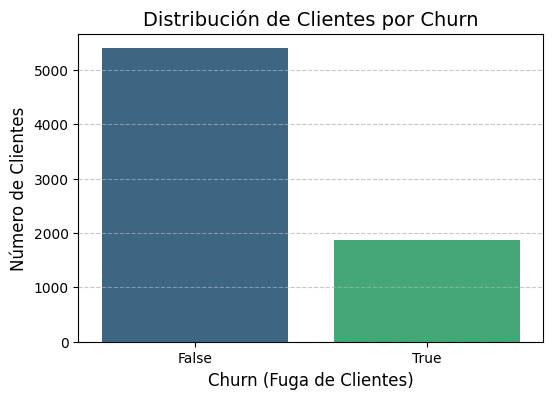

In [94]:
# Visualización de Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_telecom, palette='viridis')
plt.title('Distribución de Clientes por Churn', fontsize=14)
plt.xlabel('Churn (Fuga de Clientes)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [95]:
# --- Análisis de la Variable: Churn
# ¿Qué tipos de contrato son los más comunes?
contract_summary = pd.DataFrame({
    'Conteo': df_telecom['Contract'].value_counts(),
    'Porcentaje (%)': df_telecom['Contract'].value_counts(normalize=True) * 100
})
contract_summary

,Conteo,Porcentaje (%)
Contract,,
month-to-month,4005,55.112151
two year,1743,23.985138
one year,1519,20.902711


<ipython-input-96-2412867950>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Contract', data=df_telecom, palette='cividis', order=df_telecom['Contract'].value_counts().index)


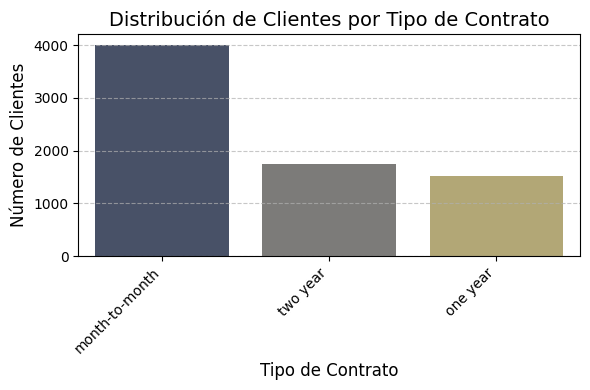

In [96]:
# Visualización de Contract
plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', data=df_telecom, palette='cividis', order=df_telecom['Contract'].value_counts().index)
plt.title('Distribución de Clientes por Tipo de Contrato', fontsize=14)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tick_params(labelsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [97]:
# --- Análisis de la Variable: PaperlessBilling
# ¿Cuántos clientes usan facturación sin papel? Siendo "True" si y "False" no
paperless_sumary = pd.DataFrame({
    'Conteo': df_telecom['PaperlessBilling'].value_counts(),
    'Porcentaje (%)': df_telecom['PaperlessBilling'].value_counts(normalize=True) * 100
})
paperless_sumary

,Conteo,Porcentaje (%)
PaperlessBilling,,
True,4311,59.322967
False,2956,40.677033


<ipython-input-98-294523788>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaperlessBilling', data=df_telecom, palette='coolwarm')


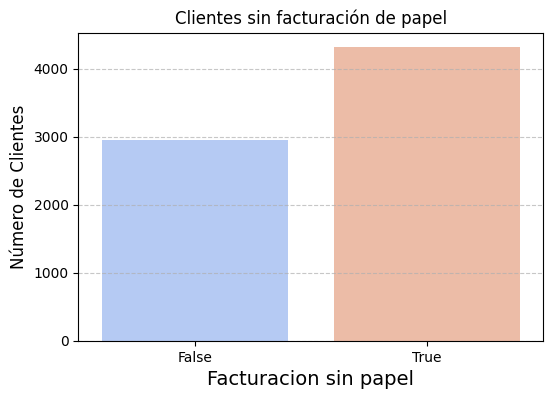

In [98]:
# Visualización de PaperlessBilling
plt.figure(figsize=(6, 4))
sns.countplot(x='PaperlessBilling', data=df_telecom, palette='coolwarm')
plt.title('Clientes sin facturación de papel')
plt.xlabel('Facturacion sin papel', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [99]:
# --- Análisis de la Variable: PaymentMethod ---
# ¿Qué metodos de pago son los mas utilizados?
payment_method_summary = pd.DataFrame({
    'Conteo': df_telecom['PaymentMethod'].value_counts(),
    'Porcentaje (%)': df_telecom['PaymentMethod'].value_counts(normalize=True) * 100
})
payment_method_summary

,Conteo,Porcentaje (%)
PaymentMethod,,
electronic check,2445,33.645246
mailed check,1665,22.911793
bank transfer (automatic),1589,21.865969
credit card (automatic),1568,21.576992


In [100]:
# --- 2. Variables Numéricas ---
# Charges.Monthly, Charges.Total, Cuentas_Diarias

# --- Análisis de Variables Numéricas: Cargos y Cuentas ---
numeric_columns = ['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
describe_stats = df_telecom[numeric_columns].describe()
describe_stats

,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000
mean,64.720098,2277.182035,2.157337
std,30.129572,2268.648587,1.004319
min,18.250000,0.000000,0.608333
25%,35.425000,396.200000,1.180833
50%,70.300000,1389.200000,2.343333
75%,89.875000,3778.525000,2.995833
max,118.750000,8684.800000,3.958333


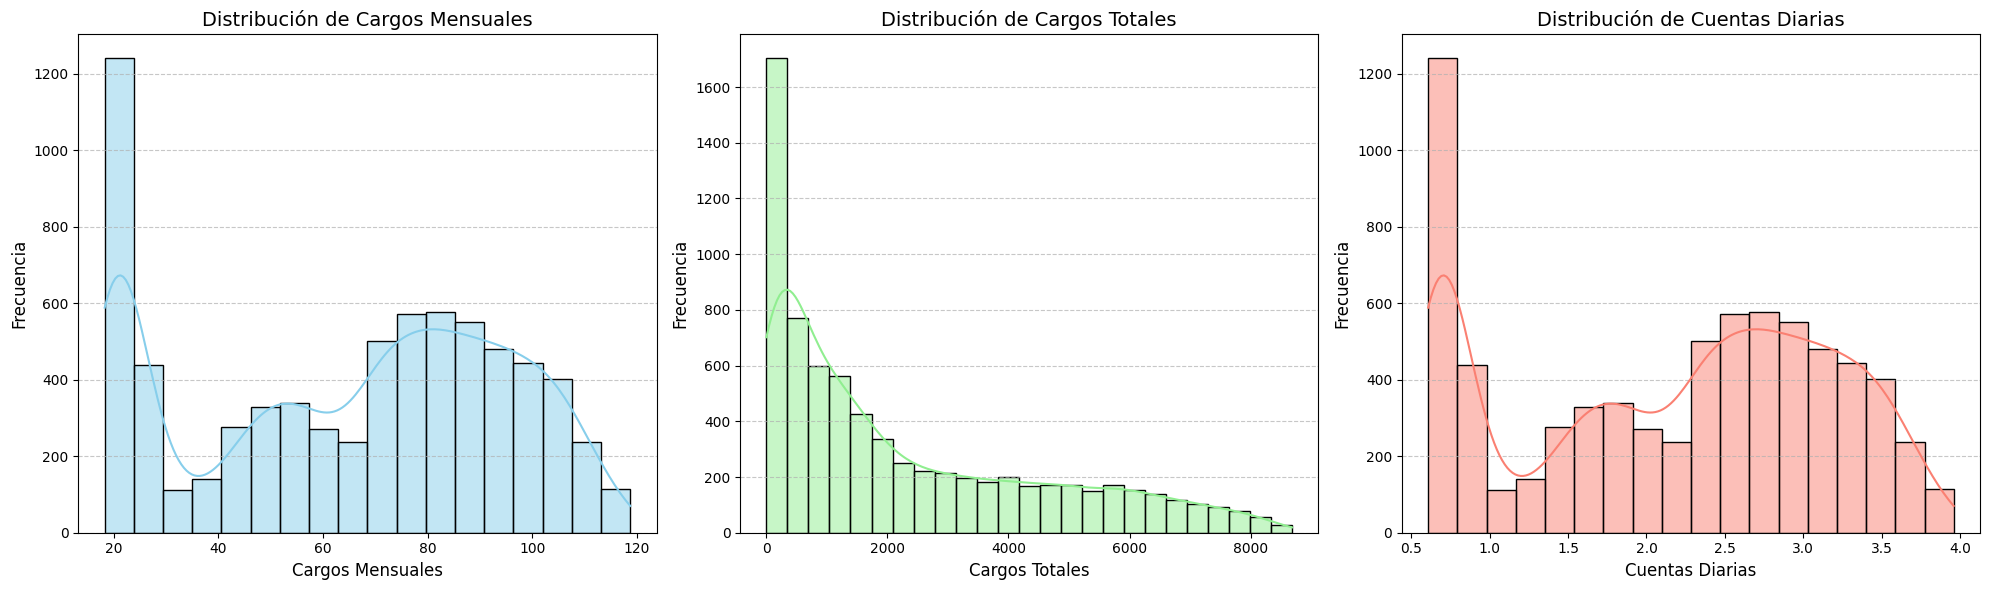

In [101]:
# Visualizaciones de Distribución (Histogramas con KDE)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(df_telecom['Charges.Monthly'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Cargos Mensuales', fontsize=14)
axes[0].set_xlabel('Cargos Mensuales', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].tick_params(labelsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(df_telecom['Charges.Total'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribución de Cargos Totales', fontsize=14)
axes[1].set_xlabel('Cargos Totales', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].tick_params(labelsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(df_telecom['Cuentas_Diarias'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Distribución de Cuentas Diarias', fontsize=14)
axes[2].set_xlabel('Cuentas Diarias', fontsize=12)
axes[2].set_ylabel('Frecuencia', fontsize=12)
axes[2].tick_params(labelsize=10)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

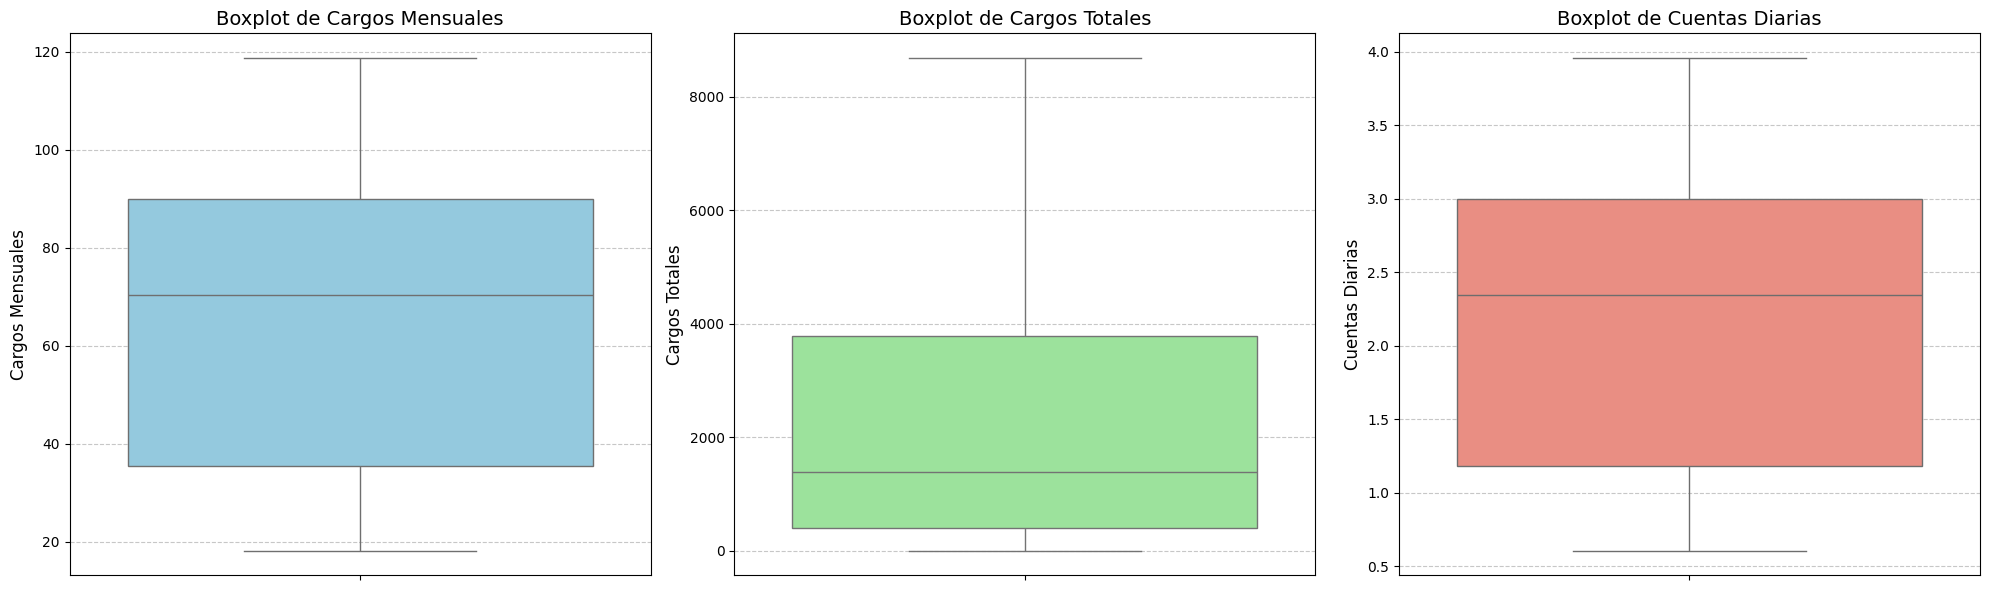

In [102]:
# Visualizaciones de Dispersión y Outliers (Boxplots)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(y=df_telecom['Charges.Monthly'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot de Cargos Mensuales', fontsize=14)
axes[0].set_ylabel('Cargos Mensuales', fontsize=12)
axes[0].tick_params(labelsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(y=df_telecom['Charges.Total'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot de Cargos Totales', fontsize=14)
axes[1].set_ylabel('Cargos Totales', fontsize=12)
axes[1].tick_params(labelsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(y=df_telecom['Cuentas_Diarias'], ax=axes[2], color='salmon')
axes[2].set_title('Boxplot de Cuentas Diarias', fontsize=14)
axes[2].set_ylabel('Cuentas Diarias', fontsize=12)
axes[2].tick_params(labelsize=10)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Recuento de evasión por variables categóricas

In [105]:
# --- Exploración de Churn por Variables Categóricas ---
# 1.1 Churn vs. Contract (Tipo de Contrato)
# Calculamos la tasa de churn para cada tipo de contrato
churn_by_contract = df_telecom.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_contract

Churn,False,True
Contract,,
month-to-month,58.676654,41.323346
one year,89.071758,10.928242
two year,97.246127,2.753873


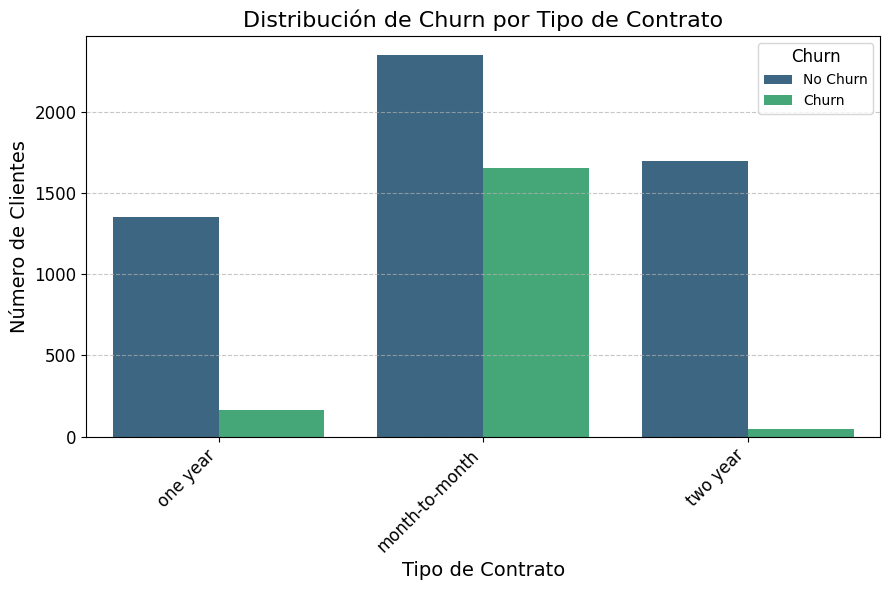

In [106]:
# Visualización
plt.figure(figsize=(9, 6))
sns.countplot(x='Contract', hue='Churn', data=df_telecom, palette='viridis')
plt.title('Distribución de Churn por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tick_params(labelsize=12)
plt.legend(title='Churn', labels=['No Churn', 'Churn'], fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [107]:
# 1.2 Churn vs. PaperlessBilling (Facturación sin Papel)
# Calculamos la tasa de churn para cada opción de facturación sin papel
churn_by_paperless = df_telecom.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_paperless

Churn,False,True
PaperlessBilling,,
False,84.133965,15.866035
True,67.524936,32.475064


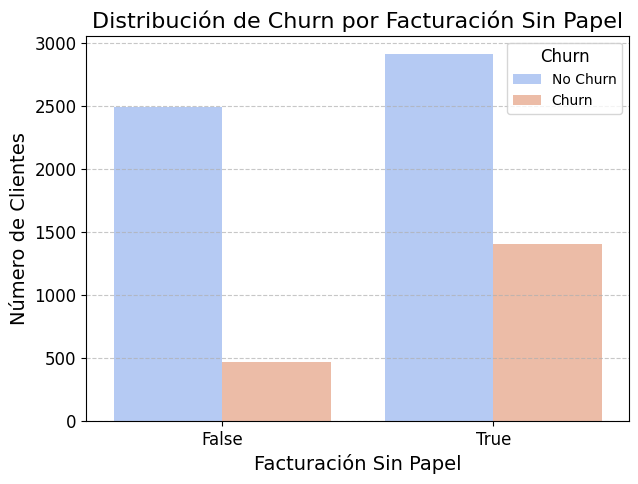

In [109]:
# Visualización
plt.figure(figsize=(7, 5))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df_telecom, palette='coolwarm')
plt.title('Distribución de Churn por Facturación Sin Papel', fontsize=16)
plt.xlabel('Facturación Sin Papel', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xticks(fontsize=12)
plt.tick_params(labelsize=12)
plt.legend(title='Churn', labels=['No Churn', 'Churn'], fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [114]:
# 1.3 Churn vs. PaymentMethod (Método de Pago)
# Calculamos la tasa de churn para cada método de pago
churn_by_payment = df_telecom.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_payment

Churn,False,True
PaymentMethod,,
bank transfer (automatic),83.763373,16.236627
credit card (automatic),85.204082,14.795918
electronic check,56.196319,43.803681
mailed check,81.501502,18.498498


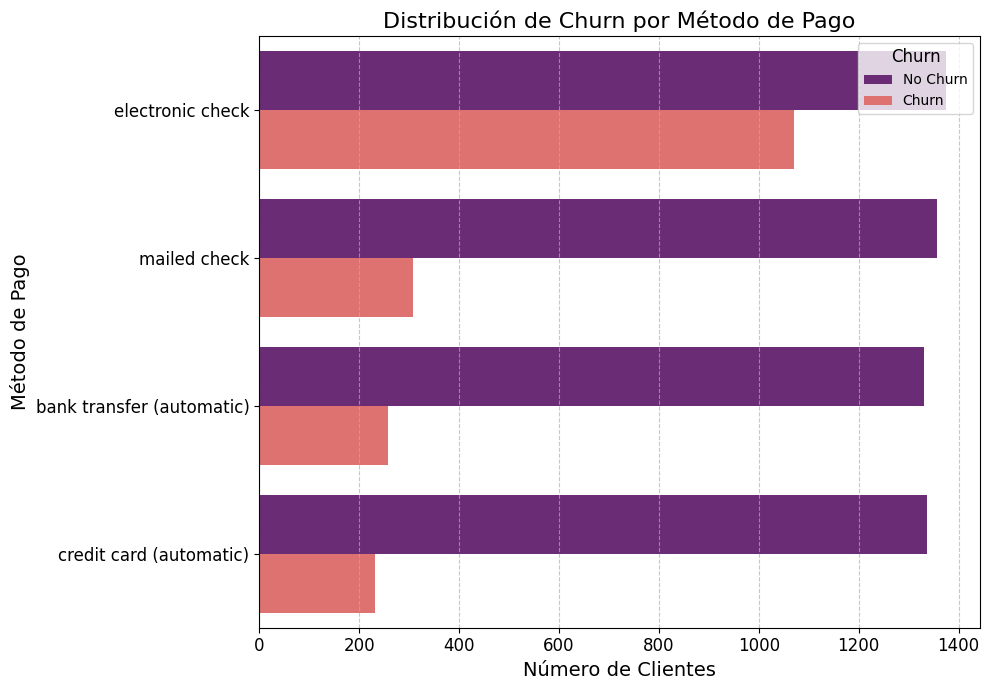

In [115]:
# Visualización
plt.figure(figsize=(10, 7))
sns.countplot(y='PaymentMethod', hue='Churn', data=df_telecom, palette='magma',
              order=df_telecom['PaymentMethod'].value_counts().index)
plt.title('Distribución de Churn por Método de Pago', fontsize=16)
plt.xlabel('Número de Clientes', fontsize=14)
plt.ylabel('Método de Pago', fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(title='Churn', labels=['No Churn', 'Churn'], fontsize=10, title_fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-117-825724057>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Monthly', data=df_telecom, palette='pastel')


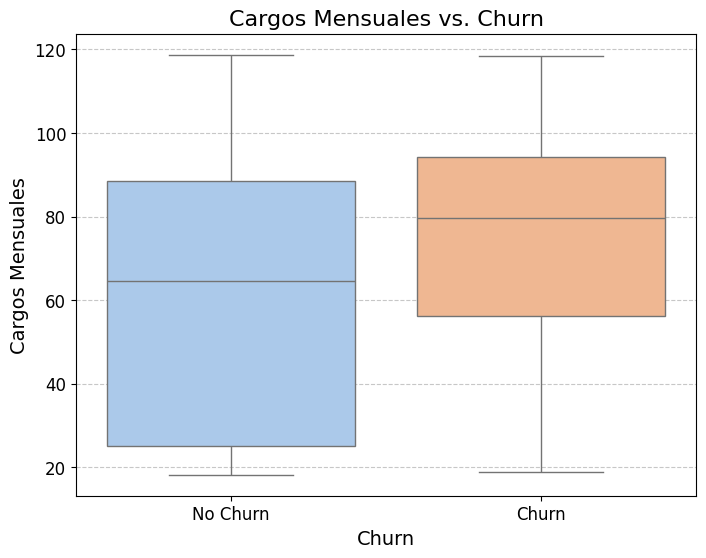

In [117]:
# --- 2. Análisis de Churn por Variables Numéricas ---

# --- Exploración de Churn por Variables Numéricas ---
# 2.1 Churn vs. Charges.Monthly (Cargos Mensuales)
# Usaremos boxplots para comparar las distribuciones de cargos mensuales para clientes con y sin churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_telecom, palette='pastel')
plt.title('Cargos Mensuales vs. Churn', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Cargos Mensuales', fontsize=14)
plt.xticks([0, 1], ['No Churn', 'Churn'], fontsize=12)
plt.tick_params(labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-119-2098793308>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=df_telecom, palette='pastel')


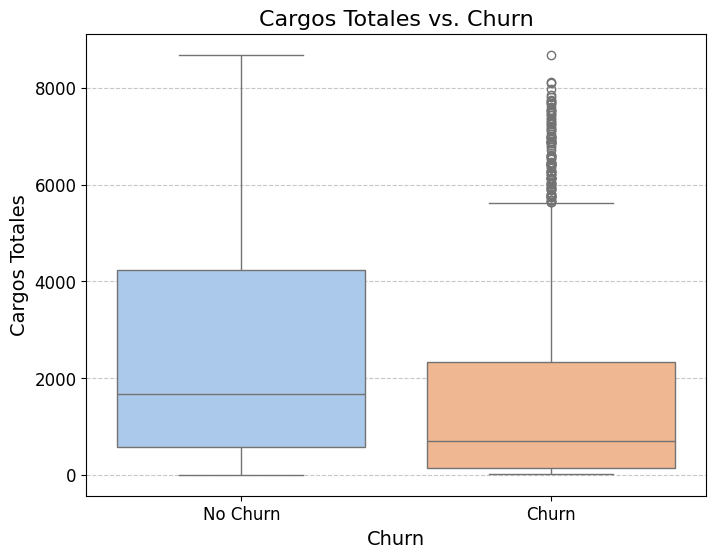

In [119]:
# 2.2 Churn vs. Charges.Total (Cargos Totales)
# Boxplots para comparar las distribuciones de cargos totales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_telecom, palette='pastel')
plt.title('Cargos Totales vs. Churn', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Cargos Totales', fontsize=14)
plt.xticks([0, 1], ['No Churn', 'Churn'], fontsize=12)
plt.tick_params(labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-121-4218182640>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df_telecom, palette='pastel')


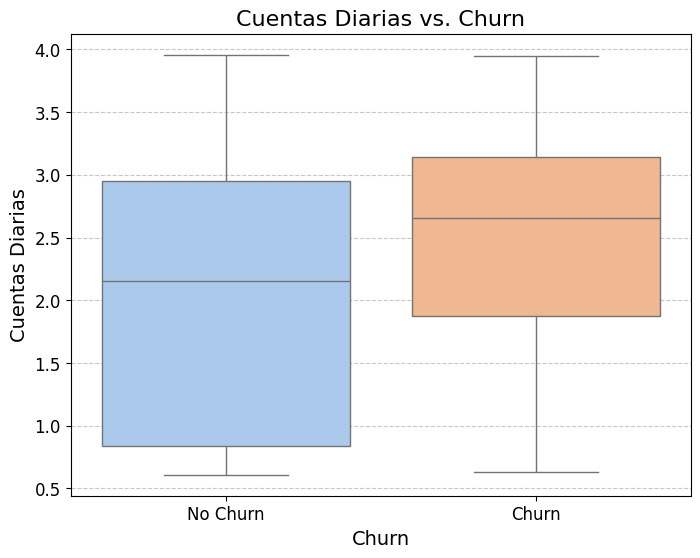

In [121]:
# 2.3 Churn vs. Cuentas_Diarias (Cuentas Diarias)
# Boxplots para comparar las distribuciones de cuentas diarias
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df_telecom, palette='pastel')
plt.title('Cuentas Diarias vs. Churn', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Cuentas Diarias', fontsize=14)
plt.xticks([0, 1], ['No Churn', 'Churn'], fontsize=12)
plt.tick_params(labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()